<a href="https://colab.research.google.com/github/Felipecl22/Portafolio-de-Ciencia-de-Datos/blob/nueva-rama/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Montando el drive para acceder a los archivos, ya que tengo los csv en mi Drive, esto no es necesario si ustedes tienen el archivo en su escritorio.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import statsmodels.api as sm

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tabla1.csv')
data

,Trimestre,Tasa de inflación
0,01-09-2011,"0,6"
1,01-12-2011,"0,1"
2,01-03-2012,"0,1"
3,01-06-2012,"0,5"
4,01-09-2012,"1,4"
5,01-12-2012,"0,2"
6,01-03-2013,"0,4"
7,01-06-2013,"0,4"
8,01-09-2013,"1,2"
9,01-12-2013,"0,8"


In [ ]:
data.columns

Index(['Trimestre', 'Tasa de inflación'], dtype='object')

In [ ]:
# Convertir la columna de fechas a tipo datetime
data['Trimestre'] = pd.to_datetime(data['Trimestre'], format='%d-%m-%Y')

In [ ]:
# Reemplazar comas por puntos y convertir a float
data['Tasa de inflación'] = data['Tasa de inflación'].str.replace(',', '.').astype(float)

In [ ]:
data.dtypes

Trimestre            datetime64[ns]
Tasa de inflación           float64
dtype: object

In [ ]:
data.set_index('Trimestre', inplace=True)

In [ ]:
data

,Tasa de inflación
Trimestre,
2011-09-01,0.6
2011-12-01,0.1
2012-03-01,0.1
2012-06-01,0.5
2012-09-01,1.4
2012-12-01,0.2
2013-03-01,0.4
2013-06-01,0.4
2013-09-01,1.2


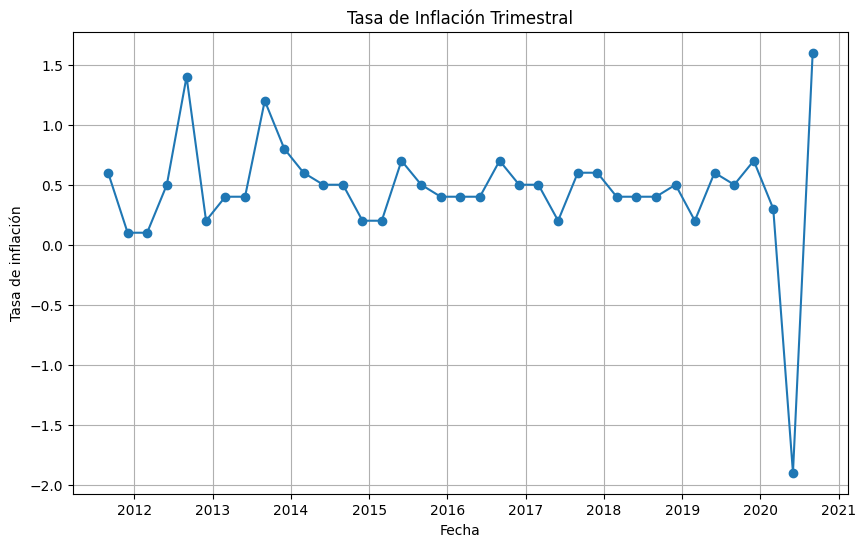

In [ ]:
import matplotlib.pyplot as plt

# Graficar la data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Tasa de inflación'], marker='o')
plt.title('Tasa de Inflación Trimestral')
plt.xlabel('Fecha')
plt.ylabel('Tasa de inflación')
plt.grid(True)
plt.show()

Sí, tu observación es correcta. Basado en la gráfica de la tasa de inflación trimestral que proporcionaste, la serie parece mostrar un patrón de nivel (horizontal). Esto significa que la serie no tiene una tendencia clara a largo plazo ni un componente estacional obvio. En este contexto, usar el suavizamiento exponencial simple (SES) es una elección adecuada. Aquí hay algunas razones para apoyar esta conclusión:

Ausencia de Tendencia Clara: La serie no muestra una tendencia ascendente o descendente consistente. Los valores fluctúan alrededor de un nivel constante.

Falta de Estacionalidad: No hay un patrón repetitivo claro que se observe en intervalos regulares, lo que indicaría estacionalidad.

Fluctuaciones Alrededor de un Nivel Medio: Los datos parecen oscilar alrededor de un valor medio con variaciones que no siguen un patrón predecible.

Eventos Atípicos: La caída drástica en 2020 seguida de un aumento en 2021 parece ser un evento aislado, probablemente relacionado con circunstancias específicas (como la pandemia de COVID-19).

Confirmación con SES
El suavizamiento exponencial simple es especialmente útil para series que presentan este tipo de patrón. Proporciona un pronóstico que sigue el nivel promedio de la serie, ajustándose ligeramente a las fluctuaciones sin reaccionar exageradamente a los cambios abruptos.

Interpretación del Pronóstico SES
Al usar SES, como se mostró en el código anterior, se obtiene un pronóstico que suaviza las variaciones a corto plazo y proporciona una buena estimación del nivel subyacente de la serie. Aquí está el proceso paso a paso y las conclusiones específicas:

Aplicación del SES: Ajustamos el modelo SES a los datos de la tasa de inflación.
Visualización: La gráfica del pronóstico SES muestra que el modelo sigue el nivel general de la serie, suavizando las fluctuaciones.
Conclusión: El SES es adecuado para series con un patrón de nivel (horizontal) y proporciona una estimación confiable del nivel constante de la serie a lo largo del tiempo.
Resumen
Tu Observación: La serie tiene un patrón de nivel (horizontal).
Método SES: Apropiado para este tipo de patrón.
Confirmación: La gráfica del pronóstico SES muestra que el modelo captura el nivel subyacente de la serie de manera efectiva.

In [ ]:
# Aplicar SES
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(data)
fit_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


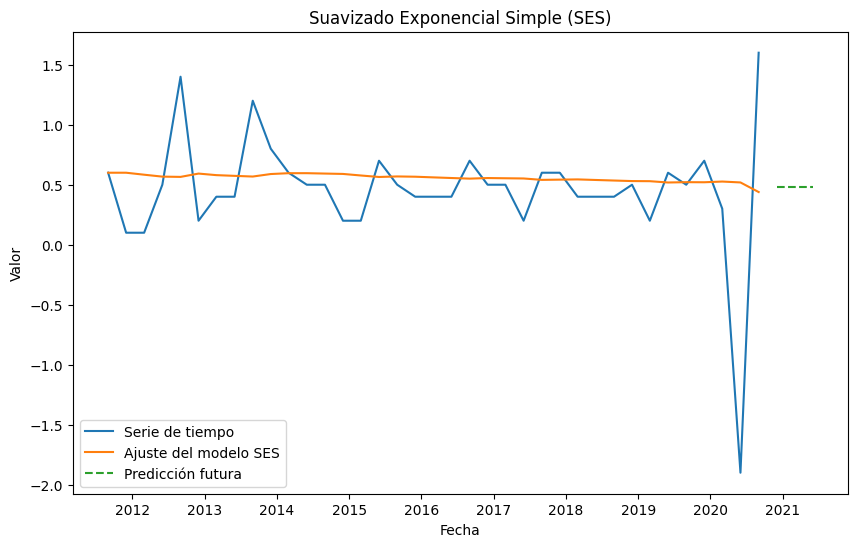

In [ ]:
# Predecir valores futuros
forecast = fit_model.forecast(steps=3)  # Por ejemplo, predecir 3 pasos hacia adelante

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(data, label='Serie de tiempo')
plt.plot(fit_model.fittedvalues, label='Ajuste del modelo SES')
plt.plot(forecast, label='Predicción futura', linestyle='--')
plt.title('Suavizado Exponencial Simple (SES)')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

SES no lograr captar el comportamiento de la data.

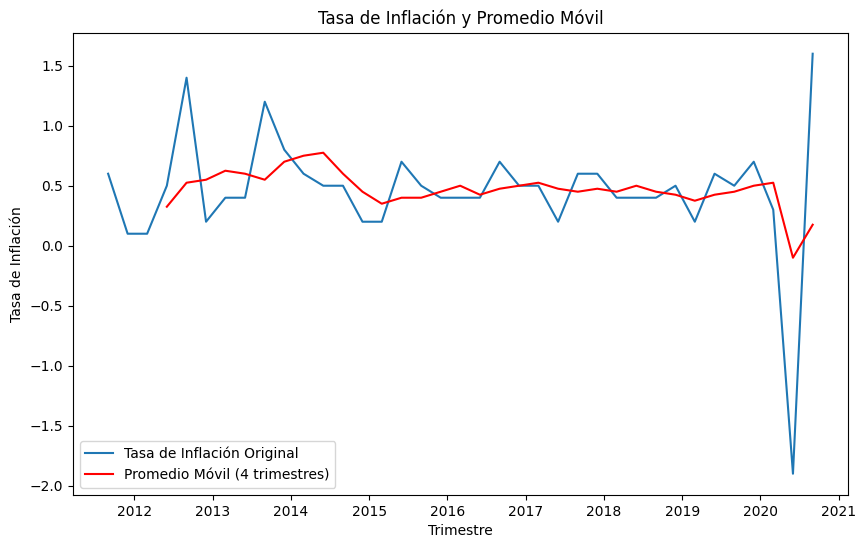

In [ ]:
import statsmodels.api as sm
# Calcular el promedio móvil con una ventana de 4 trimestres
rolling_avg = data['Tasa de inflación'].rolling(window=4).mean()

# Graficar la serie original y el promedio móvil
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Tasa de inflación'], label='Tasa de Inflación Original')
plt.plot(rolling_avg.index, rolling_avg, label='Promedio Móvil (4 trimestres)', color='red')
plt.title('Tasa de Inflación y Promedio Móvil')
plt.xlabel('Trimestre')
plt.ylabel('Tasa de Inflación')
plt.legend()
plt.show()

Promedio Móvil no lograr captar el comportamiento de la data.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)


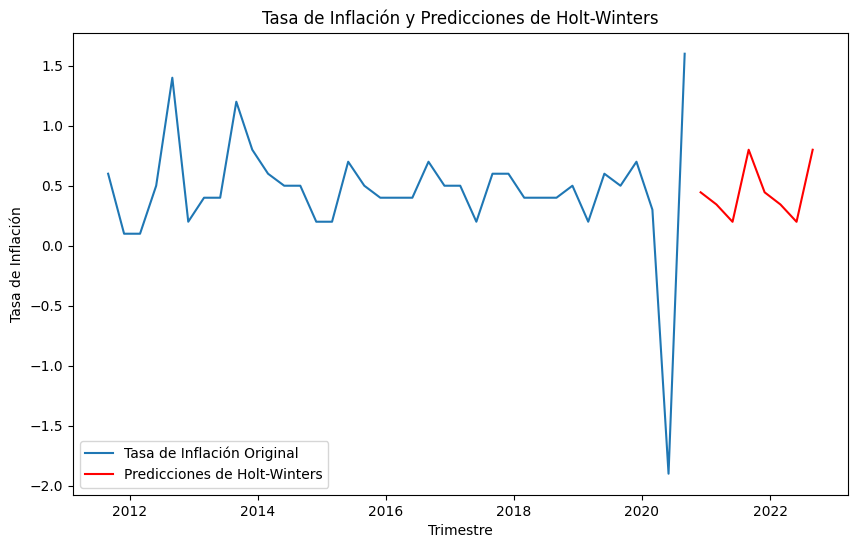

In [ ]:
# Aplicar el suavizado de Holt-Winters
model = sm.tsa.ExponentialSmoothing(data['Tasa de inflación'], seasonal='add', seasonal_periods=4)
hw_model = model.fit()

# Predecir los valores futuros
forecast = hw_model.forecast(steps=8)  # Predice 8 trimestres en el futuro

# Graficar la serie original y las predicciones
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Tasa de inflación'], label='Tasa de Inflación Original')
plt.plot(forecast.index, forecast, label='Predicciones de Holt-Winters', color='red')
plt.title('Tasa de Inflación y Predicciones de Holt-Winters')
plt.xlabel('Trimestre')
plt.ylabel('Tasa de Inflación')
plt.legend()
plt.show()

Holt - Winters logra captar el comportamiento de la data, ajustando un curva que considera los altos y bajos de la data, aún con un datos que distorsiona la serie de tiempo.